<a href="https://colab.research.google.com/github/Udzf/EV/blob/main/Fuel_type_in_Switzerland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyjstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyjstat: filename=pyjstat-2.4.0-py3-none-any.whl size=22763 sha256=aba939975c0a8286f098f56cdb470550549108799872ba9cb054a6a129b0a7b4
  Stored in directory: /root/.cache/pip/wheels/d7/b0/ac/350c026feabb6a22b2a5b3fb1f694e724c0f57c2c43ccaf738
Successfully built pyjstat


In [ ]:
import requests
import json
from pyjstat import pyjstat
import pandas as pd

# API URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-1103020100_101/px-x-1103020100_101.px"

# JSON query body
query = {
    "query": [
        {
            "code": "Kanton",
            "selection": {
                "filter": "item",
                "values": ["0"]
            }
        },
        {
            "code": "Treibstoff",
            "selection": {
                "filter": "item",
                "values": ["100", "200", "300", "9900", "9999"]
            }
        }
    ],
    "response": {
        "format": "json-stat"
    }
}

# Send POST request
headers = {
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers, data=json.dumps(query))

# Handle the response
if response.status_code == 200:
    result = response.json()

    # Parse JSON-stat to DataFrame
    dataset = pyjstat.Dataset.read(json.dumps(result))
    df = dataset.write('dataframe')

    print(df.head())
else:
    print(f"Request failed: {response.status_code}\n{response.text}")

        Canton Vehicle group / type    Fuel  Year    value
0  Switzerland     > Passenger cars  Petrol  1990  2905762
1  Switzerland     > Passenger cars  Petrol  1991  2975154
2  Switzerland     > Passenger cars  Petrol  1992  3006666
3  Switzerland     > Passenger cars  Petrol  1993  3022762
4  Switzerland     > Passenger cars  Petrol  1994  3073062


In [ ]:
df.head(30)

,Canton,Vehicle group / type,Fuel,Year,value
0,Switzerland,> Passenger cars,Petrol,1990,2905762
1,Switzerland,> Passenger cars,Petrol,1991,2975154
2,Switzerland,> Passenger cars,Petrol,1992,3006666
3,Switzerland,> Passenger cars,Petrol,1993,3022762
4,Switzerland,> Passenger cars,Petrol,1994,3073062
5,Switzerland,> Passenger cars,Petrol,1995,3132238
6,Switzerland,> Passenger cars,Petrol,1996,3166299
7,Switzerland,> Passenger cars,Petrol,1997,3216484
8,Switzerland,> Passenger cars,Petrol,1998,3269402
9,Switzerland,> Passenger cars,Petrol,1999,3342265


In [ ]:
# Create a list of the desired values
desired_values = ["> Passenger cars", "> Passenger vehicles", "> Goods vehicles", "> Agricultural vehicles", "> Industrial vehicles", "> Motorcycles"]

# Filter the DataFrame
filtered_df = df[df['Vehicle group / type'].isin(desired_values)]

# Update the original DataFrame
df = filtered_df

In [ ]:
print(df['Vehicle group / type'].unique().tolist())

['> Passenger cars', '> Passenger vehicles', '> Goods vehicles', '> Agricultural vehicles', '> Industrial vehicles', '> Motorcycles']


In [ ]:
filtered_df = df[(df['Fuel'] == 'Without motor') & (df['value'] > 0)]
vehicle_groups = filtered_df['Vehicle group / type'].unique().tolist()

print(vehicle_groups)

[]


In [ ]:
# Get the unique values from vehicle_groups
vehicle_groups_unique = set(vehicle_groups)

# Filter the DataFrame to exclude rows in vehicle_groups_unique
filtered_df = df[~df['Vehicle group / type'].isin(vehicle_groups_unique)]

# Update the original DataFrame
df = filtered_df

In [ ]:
print(df.tail())

           Canton Vehicle group / type           Fuel  Year  value
4545  Switzerland        > Motorcycles  Without motor  2020      0
4546  Switzerland        > Motorcycles  Without motor  2021      0
4547  Switzerland        > Motorcycles  Without motor  2022      0
4548  Switzerland        > Motorcycles  Without motor  2023      0
4549  Switzerland        > Motorcycles  Without motor  2024      0


In [ ]:
# Filter the DataFrame to exclude rows where Fuel is "Without motor"
filtered_df = df[df['Fuel'] != 'Without motor']

# Update the original DataFrame
df = filtered_df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 4514
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Canton                840 non-null    object
 1   Vehicle group / type  840 non-null    object
 2   Fuel                  840 non-null    object
 3   Year                  840 non-null    object
 4   value                 840 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 39.4+ KB


In [ ]:
print(df)

           Canton Vehicle group / type    Fuel  Year    value
0     Switzerland     > Passenger cars  Petrol  1990  2905762
1     Switzerland     > Passenger cars  Petrol  1991  2975154
2     Switzerland     > Passenger cars  Petrol  1992  3006666
3     Switzerland     > Passenger cars  Petrol  1993  3022762
4     Switzerland     > Passenger cars  Petrol  1994  3073062
...           ...                  ...     ...   ...      ...
4510  Switzerland        > Motorcycles   Other  2020      133
4511  Switzerland        > Motorcycles   Other  2021      225
4512  Switzerland        > Motorcycles   Other  2022      223
4513  Switzerland        > Motorcycles   Other  2023     1089
4514  Switzerland        > Motorcycles   Other  2024     1061

[840 rows x 5 columns]


In [ ]:
electricity_sums_by_year = df[df['Fuel'] == 'Electricity'].groupby('Year')['value'].sum() / df.groupby('Year')['value'].sum()

# Convert the result to a DataFrame
electricity_sums_by_year = electricity_sums_by_year.to_frame(name='% of EV')


# Display the result
print(electricity_sums_by_year)

       % of EV
Year          
1990  0.000977
1991  0.001172
1992  0.001223
1993  0.001237
1994  0.001212
1995  0.001174
1996  0.001150
1997  0.001140
1998  0.001132
1999  0.001142
2000  0.001132
2001  0.001104
2002  0.001104
2003  0.001089
2004  0.000969
2005  0.000936
2006  0.000912
2007  0.000899
2008  0.000933
2009  0.001034
2010  0.001240
2011  0.001656
2012  0.002243
2013  0.002691
2014  0.003190
2015  0.003832
2016  0.004397
2017  0.005072
2018  0.005969
2019  0.007772
2020  0.010341
2021  0.015237
2022  0.022183
2023  0.029766
2024  0.037639


In [ ]:
# Assuming electricity_sums_by_year is your DataFrame
electricity_sums_by_year = electricity_sums_by_year.rename(columns={'Year': 'Year'})  # Renaming the existing index to 'Year'

electricity_sums_by_year = electricity_sums_by_year.reset_index()  # Resetting the index to make 'Year' a regular column

In [ ]:
# Display the result
print(electricity_sums_by_year)

    Year   % of EV
0   1990  0.000977
1   1991  0.001172
2   1992  0.001223
3   1993  0.001237
4   1994  0.001212
5   1995  0.001174
6   1996  0.001150
7   1997  0.001140
8   1998  0.001132
9   1999  0.001142
10  2000  0.001132
11  2001  0.001104
12  2002  0.001104
13  2003  0.001089
14  2004  0.000969
15  2005  0.000936
16  2006  0.000912
17  2007  0.000899
18  2008  0.000933
19  2009  0.001034
20  2010  0.001240
21  2011  0.001656
22  2012  0.002243
23  2013  0.002691
24  2014  0.003190
25  2015  0.003832
26  2016  0.004397
27  2017  0.005072
28  2018  0.005969
29  2019  0.007772
30  2020  0.010341
31  2021  0.015237
32  2022  0.022183
33  2023  0.029766
34  2024  0.037639


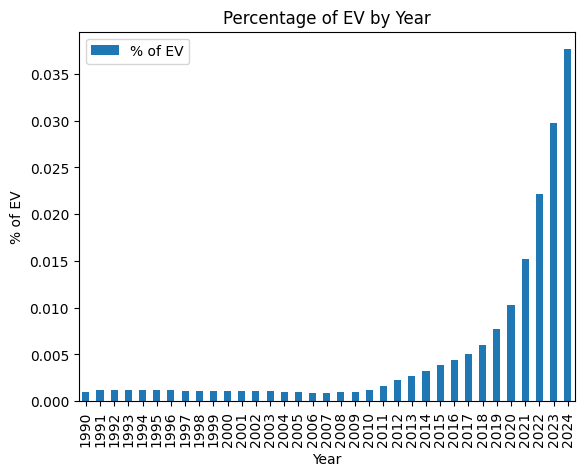

In [ ]:
import matplotlib.pyplot as plt

# Assuming electricity_sums_by_year is your DataFrame
electricity_sums_by_year.plot(x='Year', y='% of EV', kind='bar')
plt.xlabel('Year')
plt.ylabel('% of EV')
plt.title('Percentage of EV by Year')
plt.show()

In [ ]:
# Reset the index to make 'Fuel' and 'Year' regular columns
df_grouped = df.reset_index()

# Select the desired columns
df_grouped = df_grouped[['Fuel', 'Year', 'Canton', 'Vehicle group / type', 'value']]

# Optional: Sort the DataFrame by 'Fuel' and 'Year'
df_grouped = df_grouped.sort_values(by=['Fuel', 'Year'])

# Display the result
print(df_grouped)

       Fuel  Year       Canton     Vehicle group / type   value
35   Diesel  1990  Switzerland         > Passenger cars   79129
175  Diesel  1990  Switzerland     > Passenger vehicles   12747
315  Diesel  1990  Switzerland         > Goods vehicles   99436
455  Diesel  1990  Switzerland  > Agricultural vehicles  149245
595  Diesel  1990  Switzerland    > Industrial vehicles   35734
..      ...   ...          ...                      ...     ...
174  Petrol  2024  Switzerland     > Passenger vehicles    8149
314  Petrol  2024  Switzerland         > Goods vehicles   57082
454  Petrol  2024  Switzerland  > Agricultural vehicles   13111
594  Petrol  2024  Switzerland    > Industrial vehicles    6797
734  Petrol  2024  Switzerland            > Motorcycles  783535

[840 rows x 5 columns]


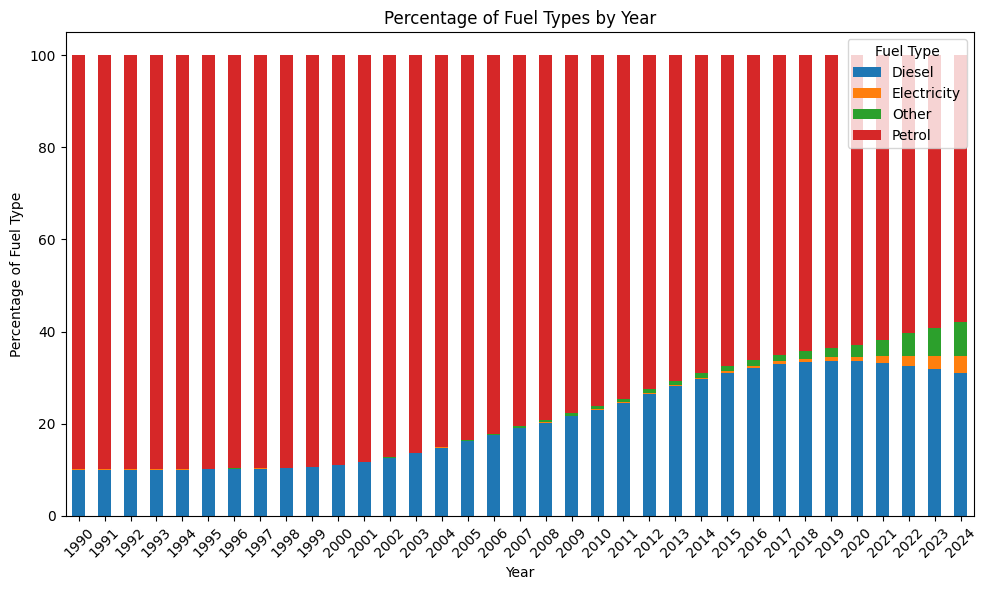

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Fuel' and calculate the sum of 'Value'
fuel_year_sums = df_grouped.groupby(['Year', 'Fuel'])['value'].sum().reset_index()

# Calculate the total sum of 'Value' for each year
year_totals = fuel_year_sums.groupby('Year')['value'].sum().reset_index()

# Merge the two DataFrames to calculate the percentage
fuel_year_sums = pd.merge(fuel_year_sums, year_totals, on='Year', suffixes=('', '_total'))
fuel_year_sums['Percentage'] = (fuel_year_sums['value'] / fuel_year_sums['value_total']) * 100

# Pivot the DataFrame to have 'Fuel' as columns and 'Percentage' as values
fuel_percentage_by_year = fuel_year_sums.pivot(index='Year', columns='Fuel', values='Percentage')

# Create the plot
fuel_percentage_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))  # Adjust figsize as needed
plt.xlabel('Year')
plt.ylabel('Percentage of Fuel Type')
plt.title('Percentage of Fuel Types by Year')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
percentage_electricity_2024 = fuel_percentage_by_year.loc[fuel_percentage_by_year.index == '2024', 'Electricity'].values[0]
print(f"Percentage of Electricity in 2024: {percentage_electricity_2024:.2f}%")

Percentage of Electricity in 2024: 3.76%


In [ ]:

# API URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-1103020100_101/px-x-1103020100_101.px"

# JSON query body
query = {

  "query": [
    {
      "code": "Kanton",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26"
        ]
      }
    },
    {
      "code": "Fahrzeuggruppe / -art",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "400",
          "500",
          "600"
        ]
      }
    },
    {
      "code": "Treibstoff",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "9900"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat"
  }
}

response = requests.post(url, headers=headers, data=json.dumps(query))

# Handle the response
if response.status_code == 200:
    result = response.json()

    # Parse JSON-stat to DataFrame
    dataset = pyjstat.Dataset.read(json.dumps(result))
    Canton_data = dataset.write('dataframe')

    print(Canton_data.head())
else:
    print(f"Request failed: {response.status_code}\n{response.text}")

   Canton Vehicle group / type    Fuel  Year   value
0  Zürich     > Passenger cars  Petrol  1990  502276
1  Zürich     > Passenger cars  Petrol  1991  508601
2  Zürich     > Passenger cars  Petrol  1992  511444
3  Zürich     > Passenger cars  Petrol  1993  510469
4  Zürich     > Passenger cars  Petrol  1994  516556


In [ ]:
# Group by 'Canton', 'Year', and 'Fuel' and calculate the sum of 'Value'
canton_year_fuel_sums = Canton_data.groupby(['Canton', 'Year', 'Fuel'])['value'].sum().reset_index()

# Calculate the total sum of 'Value' for each Canton and year
canton_year_totals = canton_year_fuel_sums.groupby(['Canton', 'Year'])['value'].sum().reset_index()

# Merge the two DataFrames to calculate the percentage
canton_year_fuel_sums = pd.merge(canton_year_fuel_sums, canton_year_totals, on=['Canton', 'Year'], suffixes=('', '_total'))
canton_year_fuel_sums['Percentage'] = (canton_year_fuel_sums['value'] / canton_year_fuel_sums['value_total']) * 100

# Filter for 'Electricity' fuel type
electricity_percentage_by_canton_year = canton_year_fuel_sums[canton_year_fuel_sums['Fuel'] == 'Electricity']

# Display the result
print(electricity_percentage_by_canton_year[['Canton', 'Year', 'Percentage']])

      Canton  Year  Percentage
1     Aargau  1990    0.054071
5     Aargau  1991    0.071048
9     Aargau  1992    0.074000
13    Aargau  1993    0.071670
17    Aargau  1994    0.065901
...      ...   ...         ...
3621  Zürich  2020    1.332480
3625  Zürich  2021    1.927696
3629  Zürich  2022    2.746738
3633  Zürich  2023    3.726824
3637  Zürich  2024    4.779282

[910 rows x 3 columns]


In [ ]:
# Find the canton with the highest percentage
highest_canton = electricity_percentage_by_canton_year.loc[electricity_percentage_by_canton_year['Percentage'].idxmax(), 'Canton']


# Find the canton with the lowest percentage
lowest_canton = electricity_percentage_by_canton_year.loc[electricity_percentage_by_canton_year['Percentage'].idxmin(), 'Canton']

print(f"Canton with the highest percentage: {highest_canton}")
print(f"Canton with the lowest percentage: {lowest_canton}")

Canton with the highest percentage: Zug
Canton with the lowest percentage: Appenzell-Innerrhoden


In [ ]:
# Sort by Percentage in descending order, get the top 2 unique cantons, and convert to a list
highest_cantons = electricity_percentage_by_canton_year.sort_values(by='Percentage', ascending=False)['Canton'].unique()[:2].tolist()

# Sort by Percentage in ascending order, get the top 2 unique cantons, and convert to a list
lowest_cantons = electricity_percentage_by_canton_year.sort_values(by='Percentage', ascending=True)['Canton'].unique()[:2].tolist()

print(f"Cantons with the highest percentage: {highest_cantons}")
print(f"Cantons with the lowest percentage: {lowest_cantons}")

Cantons with the highest percentage: ['Zug', 'Zürich']
Cantons with the lowest percentage: ['Appenzell-Innerrhoden', 'Jura']


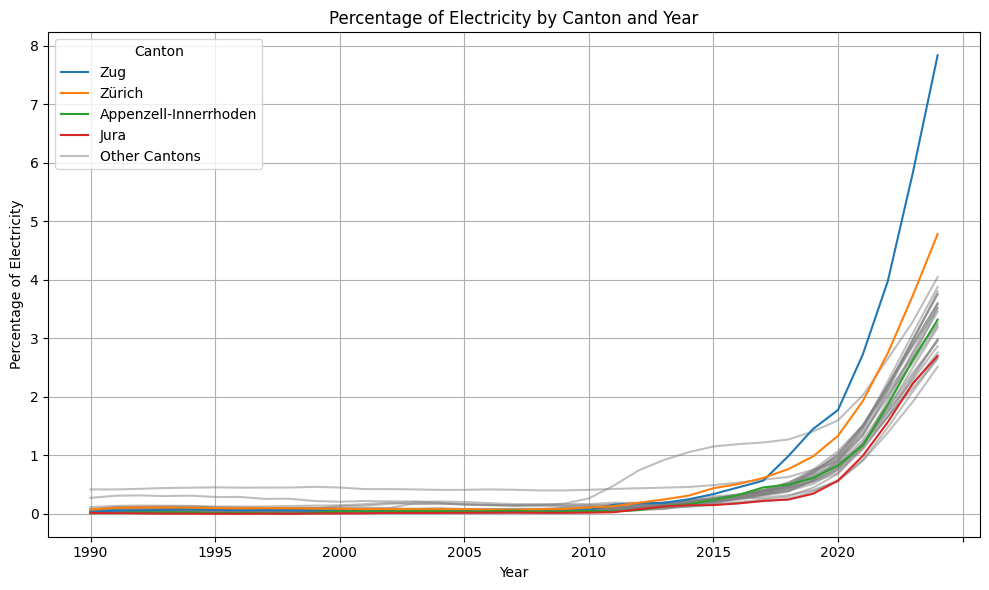

In [ ]:
import matplotlib.pyplot as plt

# Assuming canton_percentage_by_year is your DataFrame

# Define the cantons to highlight in color
highlight_cantons = ["Zug", "Zürich", "Appenzell-Innerrhoden", "Jura"]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Plot all cantons in grey without adding them to the legend
for column in canton_percentage_by_year.columns:
    if column not in highlight_cantons:
        canton_percentage_by_year[column].plot(kind='line', ax=ax, color='grey', alpha=0.5)

# Plot highlighted cantons in color
for canton in highlight_cantons:
    if canton in canton_percentage_by_year.columns:  # Check if canton is present in data
        canton_percentage_by_year[canton].plot(kind='line', ax=ax, label=canton)

# Add a dummy line for "Other Cantons" to the legend
other_canton_line = ax.plot([], [], color='grey', alpha=0.5, label='Other Cantons')[0]  # Get the line object

# Get handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Filter handles and labels to keep only desired entries
desired_labels = highlight_cantons + ['Other Cantons']
desired_handles = [h for h, l in zip(handles, labels) if l in desired_labels]
desired_labels = [l for l in labels if l in desired_labels]  # Keep original order

# Create the legend with filtered handles and labels
plt.legend(desired_handles, desired_labels, title='Canton')

plt.xlabel('Year')
plt.ylabel('Percentage of Electricity')
plt.title('Percentage of Electricity by Canton and Year')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
print(electricity_percentage_by_canton_year)

      Canton  Year         Fuel  value  value_total  Percentage
1     Aargau  1990  Electricity    156       288512    0.054071
5     Aargau  1991  Electricity    211       296981    0.071048
9     Aargau  1992  Electricity    224       302702    0.074000
13    Aargau  1993  Electricity    220       306964    0.071670
17    Aargau  1994  Electricity    207       314108    0.065901
...      ...   ...          ...    ...          ...         ...
3621  Zürich  2020  Electricity  12931       970446    1.332480
3625  Zürich  2021  Electricity  18987       984958    1.927696
3629  Zürich  2022  Electricity  27127       987608    2.746738
3633  Zürich  2023  Electricity  37277      1000235    3.726824
3637  Zürich  2024  Electricity  48156      1007599    4.779282

[910 rows x 6 columns]


In [ ]:
electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])
electricity_percentage_by_canton_year_2010 = electricity_percentage_by_canton_year[electricity_percentage_by_canton_year['Year'] >= 2010]

<ipython-input-41-d9b1a17dffcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])


In [ ]:
print(electricity_percentage_by_canton_year_2010.head(20))

                     Canton  Year         Fuel  value  value_total  Percentage
81                   Aargau  2010  Electricity    292       440480    0.066291
85                   Aargau  2011  Electricity    333       452282    0.073627
89                   Aargau  2012  Electricity    470       463958    0.101302
93                   Aargau  2013  Electricity    566       473792    0.119462
97                   Aargau  2014  Electricity    769       483150    0.159164
101                  Aargau  2015  Electricity   1066       490185    0.217469
105                  Aargau  2016  Electricity   1429       498194    0.286836
109                  Aargau  2017  Electricity   1850       505108    0.366258
113                  Aargau  2018  Electricity   2275       513127    0.443360
117                  Aargau  2019  Electricity   3226       519246    0.621285
121                  Aargau  2020  Electricity   4640       528456    0.878030
125                  Aargau  2021  Electricity   731

In [ ]:
# Sort by Percentage in descending order, get the top 2 unique cantons, and convert to a list
highest_cantons_2010 = electricity_percentage_by_canton_year_2010.sort_values(by='Percentage', ascending=False)['Canton'].unique()[:2].tolist()

# Sort by Percentage in ascending order, get the top 2 unique cantons, and convert to a list
lowest_cantons_2010 = electricity_percentage_by_canton_year_2010.sort_values(by='Percentage', ascending=True)['Canton'].unique()[:2].tolist()

print(f"Cantons with the highest percentage: {highest_cantons_2010}")
print(f"Cantons with the lowest percentage: {lowest_cantons_2010}")

Cantons with the highest percentage: ['Zug', 'Zürich']
Cantons with the lowest percentage: ['Jura', 'Fribourg']


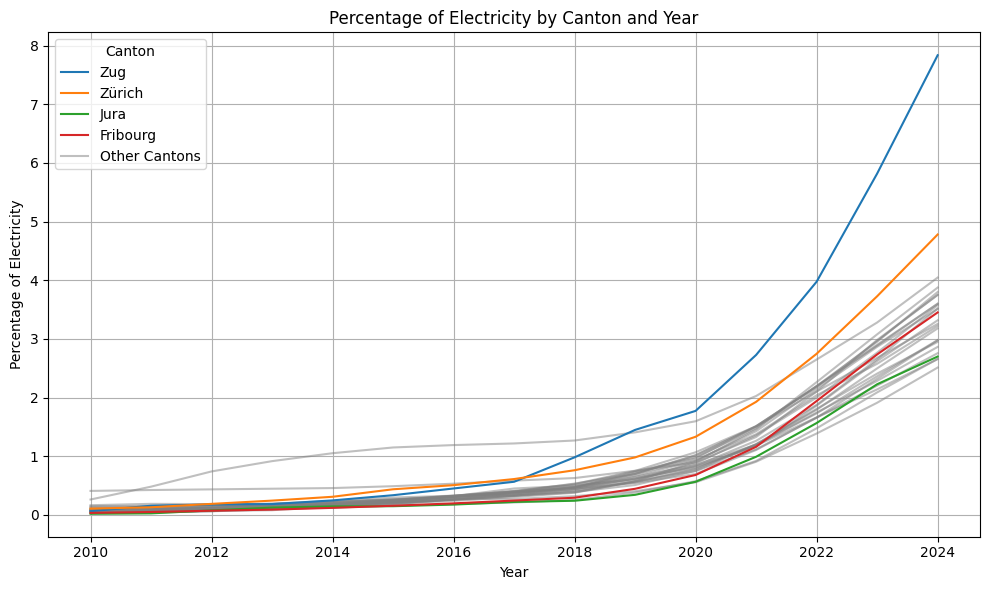

In [ ]:
# Define the cantons to highlight in color
highlight_cantons = ["Zug", "Zürich", "Jura", "Fribourg"]  # Updated highlight_cantons

# Pivot to create canton_percentage_by_year_2010
canton_percentage_by_year_2010 = electricity_percentage_by_canton_year_2010.pivot(
    index='Year', columns='Canton', values='Percentage'
)


# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Plot all cantons in grey without adding them to the legend
for column in canton_percentage_by_year_2010.columns:
    if column not in highlight_cantons:
        canton_percentage_by_year_2010[column].plot(kind='line', ax=ax, color='grey', alpha=0.5)

# Plot highlighted cantons in color
for canton in highlight_cantons:
    if canton in canton_percentage_by_year_2010.columns:  # Check if canton is present in data
        canton_percentage_by_year_2010[canton].plot(kind='line', ax=ax, label=canton)

# Add a dummy line for "Other Cantons" to the legend
other_canton_line = ax.plot([], [], color='grey', alpha=0.5, label='Other Cantons')[0]  # Get the line object

# Get handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Filter handles and labels to keep only desired entries
desired_labels = highlight_cantons + ['Other Cantons']
desired_handles = [h for h, l in zip(handles, labels) if l in desired_labels]
desired_labels = [l for l in labels if l in desired_labels]  # Keep original order

# Create the legend with filtered handles and labels
plt.legend(desired_handles, desired_labels, title='Canton')

plt.xlabel('Year')
plt.ylabel('Percentage of Electricity')
plt.title('Percentage of Electricity by Canton and Year')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Filter for the year 2024
data_2024 = electricity_percentage_by_canton_year_2010[electricity_percentage_by_canton_year_2010['Year'] == 2024]

# Sort by Percentage in ascending order and get the top 2 unique cantons
lowest_cantons_2024 = data_2024.sort_values(by='Percentage', ascending=True)['Canton'].unique()[:2].tolist()

print(f"Cantons with the lowest percentage in 2024: {lowest_cantons_2024}")

Cantons with the lowest percentage in 2024: ['Uri', 'Genève']


<ipython-input-52-a0825e3f9f9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])


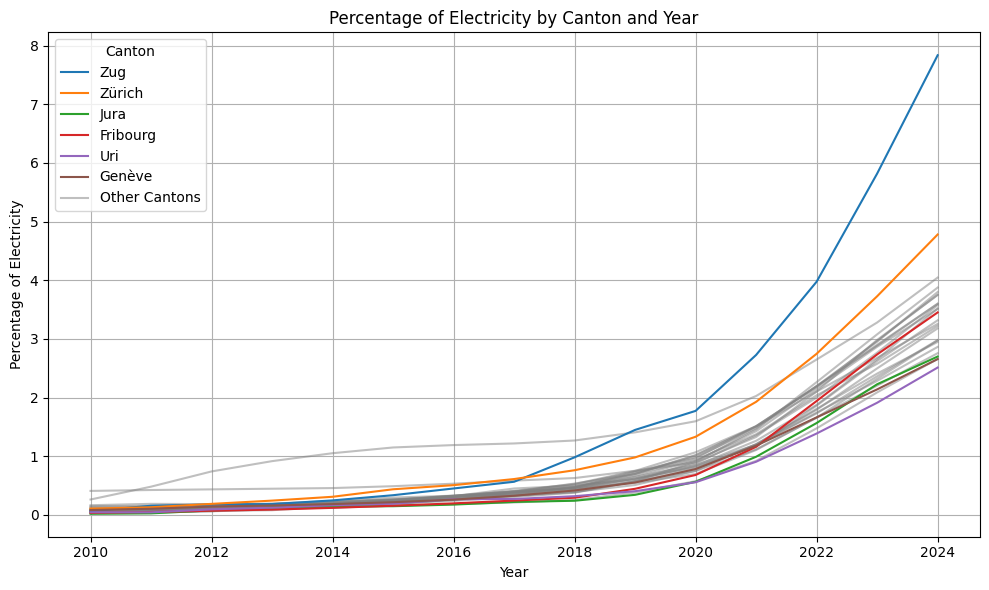

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming electricity_percentage_by_canton_year is your DataFrame
electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])
electricity_percentage_by_canton_year_2010 = electricity_percentage_by_canton_year[electricity_percentage_by_canton_year['Year'] >= 2010]

# Define the cantons to highlight in color
highlight_cantons = ["Zug", "Zürich", "Jura", "Fribourg", "Uri", "Genève"]  # Updated highlight_cantons

# Pivot to create canton_percentage_by_year_2010
canton_percentage_by_year_2010 = electricity_percentage_by_canton_year_2010.pivot(
    index='Year', columns='Canton', values='Percentage'
)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Plot all cantons in grey without adding them to the legend
for column in canton_percentage_by_year_2010.columns:
    if column not in highlight_cantons:
        canton_percentage_by_year_2010[column].plot(kind='line', ax=ax, color='grey', alpha=0.5)

# Plot highlighted cantons in color
for canton in highlight_cantons:
    if canton in canton_percentage_by_year_2010.columns:  # Check if canton is present in data
        canton_percentage_by_year_2010[canton].plot(kind='line', ax=ax, label=canton)

# Add a dummy line for "Other Cantons" to the legend
other_canton_line = ax.plot([], [], color='grey', alpha=0.5, label='Other Cantons')[0]  # Get the line object

# Get handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Filter handles and labels to keep only desired entries
desired_labels = highlight_cantons + ['Other Cantons']
desired_handles = [h for h, l in zip(handles, labels) if l in desired_labels]
desired_labels = [l for l in labels if l in desired_labels]  # Keep original order

# Create the legend with filtered handles and labels
plt.legend(desired_handles, desired_labels, title='Canton')

plt.xlabel('Year')
plt.ylabel('Percentage of Electricity')
plt.title('Percentage of Electricity by Canton and Year')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
print("Geneva" in electricity_percentage_by_canton_year_2010["Canton"].unique())

False
